In [2]:
print("does this work?")    

does this work?


In [5]:
!unzip dataset.zip -d dataset

Archive:  dataset.zip
  inflating: dataset/annotations/Cars0.xml  
  inflating: dataset/annotations/Cars1.xml  
  inflating: dataset/annotations/Cars10.xml  
  inflating: dataset/annotations/Cars100.xml  
  inflating: dataset/annotations/Cars101.xml  
  inflating: dataset/annotations/Cars102.xml  
  inflating: dataset/annotations/Cars103.xml  
  inflating: dataset/annotations/Cars104.xml  
  inflating: dataset/annotations/Cars105.xml  
  inflating: dataset/annotations/Cars106.xml  
  inflating: dataset/annotations/Cars107.xml  
  inflating: dataset/annotations/Cars108.xml  
  inflating: dataset/annotations/Cars109.xml  
  inflating: dataset/annotations/Cars11.xml  
  inflating: dataset/annotations/Cars110.xml  
  inflating: dataset/annotations/Cars111.xml  
  inflating: dataset/annotations/Cars112.xml  
  inflating: dataset/annotations/Cars113.xml  
  inflating: dataset/annotations/Cars114.xml  
  inflating: dataset/annotations/Cars115.xml  
  inflating: dataset/annotations/Cars116.xml

In [16]:
!pip3 install pylabel

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 1.6 MB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.4 MB/s eta 0:00:001.6 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [17]:
from pylabel import importer
PATH_TO_ANNOTATIONS = './dataset/annotations'
dataset = importer.ImportVOC(path=PATH_TO_ANNOTATIONS)
dataset.export.ExportToYoloV5()

Exporting YOLO files...: 100%|██████████| 433/433 [00:00<00:00, 1328.09it/s]


['training/dataset.yaml',
 'training/labels/Cars388.txt',
 'training/labels/Cars386.txt',
 'training/labels/Cars299.txt',
 'training/labels/Cars224.txt',
 'training/labels/Cars322.txt',
 'training/labels/Cars101.txt',
 'training/labels/Cars268.txt',
 'training/labels/Cars87.txt',
 'training/labels/Cars213.txt',
 'training/labels/Cars12.txt',
 'training/labels/Cars281.txt',
 'training/labels/Cars112.txt',
 'training/labels/Cars387.txt',
 'training/labels/Cars320.txt',
 'training/labels/Cars120.txt',
 'training/labels/Cars144.txt',
 'training/labels/Cars368.txt',
 'training/labels/Cars304.txt',
 'training/labels/Cars165.txt',
 'training/labels/Cars195.txt',
 'training/labels/Cars378.txt',
 'training/labels/Cars100.txt',
 'training/labels/Cars424.txt',
 'training/labels/Cars426.txt',
 'training/labels/Cars264.txt',
 'training/labels/Cars188.txt',
 'training/labels/Cars27.txt',
 'training/labels/Cars360.txt',
 'training/labels/Cars307.txt',
 'training/labels/Cars260.txt',
 'training/labels

In [18]:
!cp -r './dataset/images' './training/'

In [ ]:
import cv2
import os


def draw_bounding_box(image, label_path, class_names, normalized=True):
    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()

    for line in lines:
        class_id, x_center, y_center, box_width, box_height = map(
            float, line.split())
        class_id = int(class_id)

        if not normalized:
            # If coordinates are not normalized, convert them to normalized
            width, height = image.shape[1], image.shape[0]
            x_center /= width
            y_center /= height
            box_width /= width
            box_height /= height

        # Convert YOLO format to (xmin, ymin, xmax, ymax)
        width, height = image.shape[1], image.shape[0]
        xmin = int((x_center - box_width / 2) * width)
        ymin = int((y_center - box_height / 2) * height)
        xmax = int((x_center + box_width / 2) * width)
        ymax = int((y_center + box_height / 2) * height)

        # Draw bounding box
        color = (0, 255, 0)  # Green color
        thickness = 2
        image = cv2.rectangle(image, (xmin, ymin),
                              (xmax, ymax), color, thickness)

        # Draw class name
        class_name = class_names[class_id]
        text = f"{class_name}"
        org = (xmin, ymin - 5)  # Slightly above the bounding box
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        cv2.putText(image, text, org, font, font_scale,
                    color, thickness, cv2.LINE_AA)

    return image


def save_images_with_annotations(image_folder, label_folder, output_folder, class_names, normalized=True):
    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            label_path = os.path.join(
                label_folder, os.path.splitext(filename)[0] + ".txt")

            if os.path.exists(label_path):
                image = cv2.imread(image_path)
                image_with_boxes = draw_bounding_box(
                    image, label_path, class_names, normalized)

                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, image_with_boxes)


image_folder = "training/images"
label_folder = "training/labels"
output_folder = "Output/Sample_Images"
class_names = ["licence"]  # Update with your class names

save_images_with_annotations(
    image_folder, label_folder, output_folder, class_names)

In [1]:
from ultralytics import YOLO

model=YOLO('yolov5n.pt')
results = model.train(data='../training/dataset.yaml', epochs=10, imgsz=640, device=[0])

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3902MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=../training/dataset.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False,

2024-02-01 20:44:44.911662: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 20:44:44.911708: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 20:44:44.912380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

train: Scanning /home/the_architect/Projects/AI_Projects/training/labels.cache... 433 images, 0 backgrounds, 0 corrupt: 100%|██████████| 433/433 [00:00<?, ?it/s]
val: Scanning /home/the_architect/Projects/AI_Projects/training/labels.cache... 433 images, 0 backgrounds, 0 corrupt: 100%|██████████| 433/433 [00:00<?, ?it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

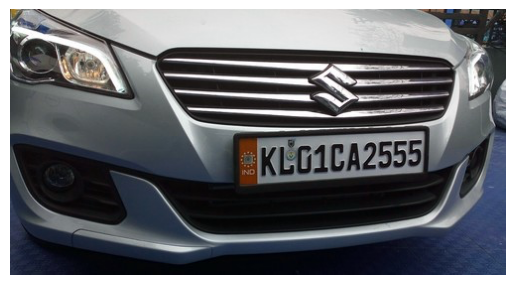

In [6]:
import cv2
from matplotlib import pyplot as plt

image=cv2.imread("dataset/images/Cars0.png")
plt.imshow(image)
plt.axis("off")
plt.show